<a href="https://colab.research.google.com/github/lakshya324/MLCOE-Task-1-EDA/blob/main/Task1_2_Exploratory_Data_Analysis(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLCOE Task 1.2 - Exploratory Data Analysis(EDA) [Given Dataset]
$\textrm{Lakshya Sharma} $

<details><summary>what is EDA?</summary>

<b>Exploratory data analysis (EDA)</b> is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.
</details>

##Step 1: Data Preprocessing

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

### Importing Dataset

In [2]:
df=pd.read_csv('MLCOE Task 1 - second_draft.csv')
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,NaN,Male,Blouse,Clothing,NaN,Kentucky,L,Gray,Winter,NaN,yep,Credit Card,Express,Indeed,y,14,Venmo,Fortnightly
1,2,NaN,Male,Sweater,Clothing,NaN,Maine,L,Maroon,Winter,NaN,Yes,Bank Transfer,Express,Yes,Yo,2,Cash,Fortnightly
2,3,NaN,Male,Jeans,Clothing,NaN,Massachusetts,S,Maroon,Spring,NaN,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,NaN,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,NaN,Yes,PayPal,Next Day Air,Indeed,Yo,49,PayPal,Weekly
4,5,NaN,Male,Blouse,Clothing,NaN,Oregon,M,Turquoise,Spring,NaN,Yo,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40.0,Female,Hoodie,Clothing,28.0,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,Nah,32,Venmo,Weekly
3896,3897,52.0,Female,Backpack,Accessories,49.0,Iowa,L,White,Spring,4.5,ille,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46.0,Female,Belt,Accessories,33.0,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,n,No,24,Venmo,Quarterly
3898,3899,44.0,Female,Shoes,Footwear,77.0,Minnesota,S,Brown,Summer,3.8,N,PayPal,Express,Nakko,No,24,Venmo,Weekly


In [3]:
df.shape

(3900, 19)

In [4]:
dataset=df.iloc[:,:].values
dataset

array([[1, nan, 'Male', ..., 14, 'Venmo', 'Fortnightly'],
       [2, nan, 'Male', ..., 2, 'Cash', 'Fortnightly'],
       [3, nan, 'Male', ..., 23, 'Credit Card', 'Weekly'],
       ...,
       [3898, 46.0, 'Female', ..., 24, 'Venmo', 'Quarterly'],
       [3899, 44.0, 'Female', ..., 24, 'Venmo', 'Weekly'],
       [3900, 52.0, 'Female', ..., 33, 'Venmo', 'Quarterly']],
      dtype=object)

### Missing Values

In [5]:
for i in range(df.shape[1]):
  print(f"{df.columns[i]} ({i}) : {df.iloc[:,i].unique()} \n")

Customer ID (0) : [   1    2    3 ... 3898 3899 3900] 

Age (1) : [nan 57. 65. 25. 31. 38. 56. 35. 29. 69. 20. 39. 50. 55. 68. 47. 40. 41.
 33. 45. 49. 64. 36. 24. 52. 37. 51. 70. 58. 44. 53. 28. 30. 27. 54. 59.
 21. 67. 18. 19. 32. 48. 63. 26. 66. 62. 42. 23. 43. 22. 46. 60. 34. 61.] 

Gender (2) : ['Male' 'Female'] 

Item Purchased (3) : ['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves'] 

Category (4) : ['Clothing' 'Footwear' 'Outerwear' 'Accessories'] 

Purchase Amount (USD) (5) : [ nan  90.  31.  81.  36.  51.  62.  37.  88.  22.  48.  67.  91.  39.
  53.  43.  54.  79.  94.  58.  28.  41.  87.  40.  35.  85.  95.  72.
  86.  29.  46.  77.  73.  27.  49.  74.  25.  61.  56. 100.  38.  64.
  55.  50.  83.  20.  57.  59.  69.  42.  60.  32.  24.  82.  33.  47.
  68.  76.  93.  65.  66.  45.  99.  26.  71.  89.

In [6]:
#Columns with Missing Values (nan):
#     Age [1]
#     Purchase Amount (USD) [5]
#     Review Rating [10]

#Colums with Categorical data:
#     Gender (2) -> Label Encoding
#     Item Purchased (3) -> (I will remove this column as 'Category' will be enough)
#     Category (4) -> Label Encoding
#     Location (6) -> Label Encoding
#     Size (7) -> Label Encoding
#     Color (8) -> Label Encoding
#     Season (9) -> Label Encoding
#     Subscription Status (11) -> Label Encoding (change into 0 ot 1)
#     Payment Method (12) -> One-Hot Encoding
#     Shipping Type (13) -> One-Hot Encoding
#     Discount Applied (14) -> Label Encoding (change into 0 ot 1)
#     Promo Code Used (15) -> Label Encoding (change into 0 ot 1)
#     Previous Purchases (16) -> NO CHANGE required
#     Preferred Payment Method (17) -> One-Hot Encoding
#     Frequency of Purchases (18) -> One-Hot Encoding

#### Age Column

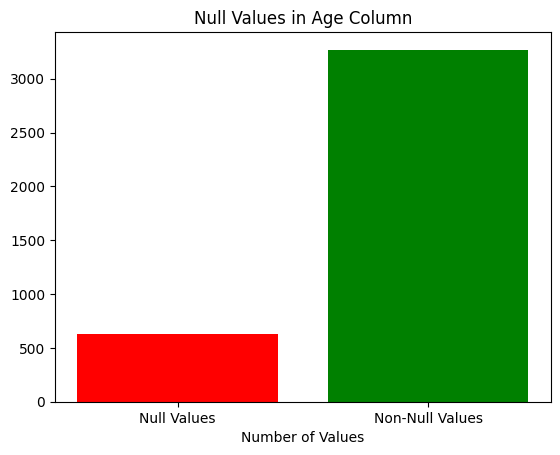

In [7]:
plt.bar(['Null Values','Non-Null Values'],[df['Age'].isnull().sum(),df['Age'].count()],color=['r','g'])
plt.title('Null Values in Age Column')
plt.xlabel('Types of Values')
plt.xlabel('Number of Values')
plt.show()

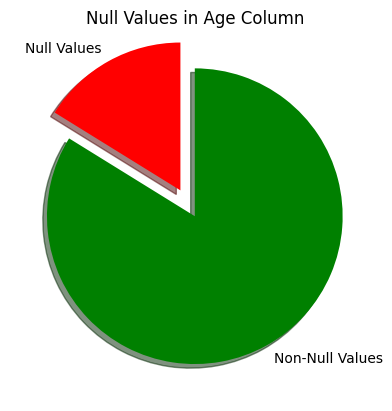

In [8]:
plt.pie([df['Age'].isnull().sum(),df['Age'].count()],labels=['Null Values','Non-Null Values'],startangle=90,explode=[0.2,0],shadow=True,colors=['r','g'])
plt.title('Null Values in Age Column')
plt.show()

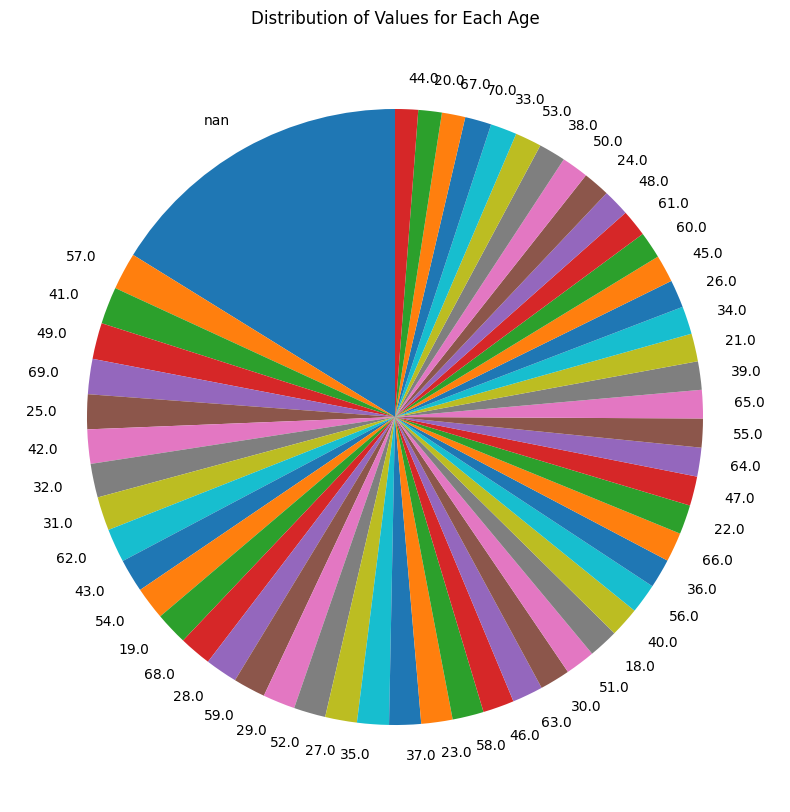

In [9]:
age_counts = df['Age'].value_counts(dropna=False)
plt.figure(figsize=(10,10))
plt.pie(age_counts,labels=age_counts.index,startangle=90)
plt.title('Distribution of Values for Each Age')
plt.show()

In [10]:
# Changing Missing Value with Mean
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
dataset[:,1:2]=np.array(imputer.fit_transform(dataset[:,1:2]))
dataset

array([[1, 43.97399816457632, 'Male', ..., 14, 'Venmo', 'Fortnightly'],
       [2, 43.97399816457632, 'Male', ..., 2, 'Cash', 'Fortnightly'],
       [3, 43.97399816457632, 'Male', ..., 23, 'Credit Card', 'Weekly'],
       ...,
       [3898, 46.0, 'Female', ..., 24, 'Venmo', 'Quarterly'],
       [3899, 44.0, 'Female', ..., 24, 'Venmo', 'Weekly'],
       [3900, 52.0, 'Female', ..., 33, 'Venmo', 'Quarterly']],
      dtype=object)

#### Purchase Amount Column

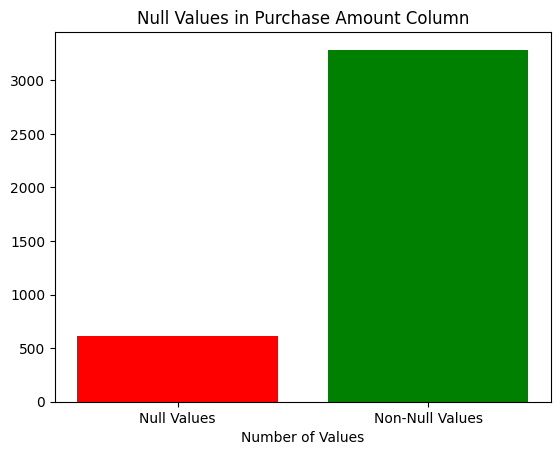

In [11]:
plt.bar(['Null Values','Non-Null Values'],[df['Purchase Amount (USD)'].isnull().sum(),df['Purchase Amount (USD)'].count()],color=['r','g'])
plt.title('Null Values in Purchase Amount Column')
plt.xlabel('Types of Values')
plt.xlabel('Number of Values')
plt.show()

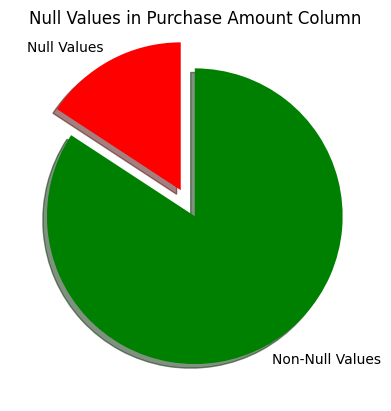

In [12]:
plt.pie([df['Purchase Amount (USD)'].isnull().sum(),df['Purchase Amount (USD)'].count()],labels=['Null Values','Non-Null Values'],startangle=90,explode=[0.2,0],shadow=True,colors=['r','g'])
plt.title('Null Values in Purchase Amount Column')
plt.show()

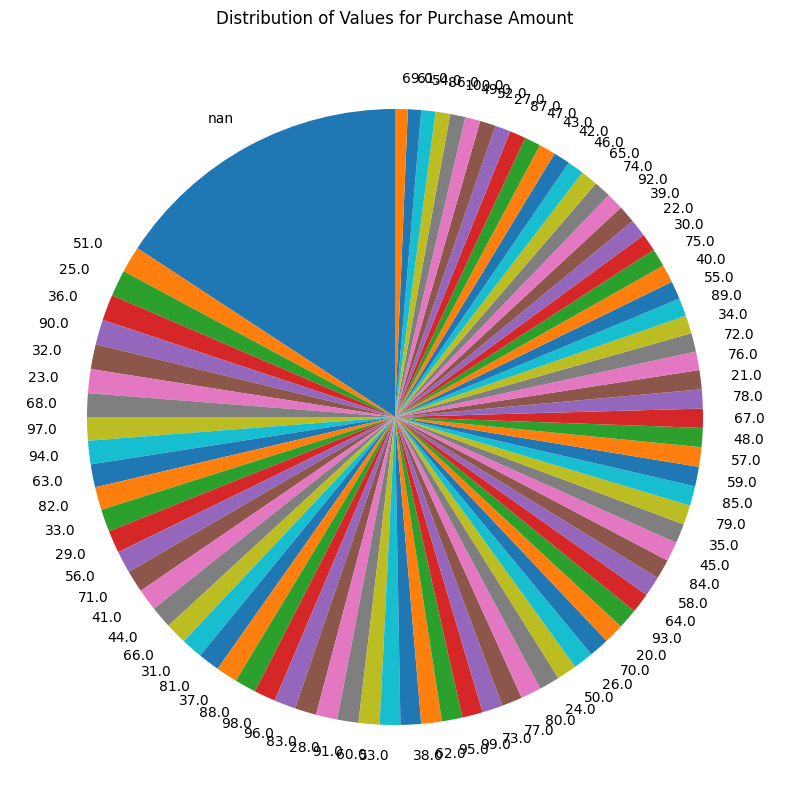

In [13]:
purchase_counts = df['Purchase Amount (USD)'].value_counts(dropna=False)
plt.figure(figsize=(10,10))
plt.pie(purchase_counts,labels=purchase_counts.index,startangle=90)
plt.title('Distribution of Values for Purchase Amount')
plt.show()

In [14]:
# Changing Missing Value with Mean
dataset[:,5:6]=np.array(imputer.fit_transform(dataset[:,5:6]))
dataset[:,5]

array([59.863013698630134, 59.863013698630134, 59.863013698630134, ...,
       33.0, 77.0, 59.863013698630134], dtype=object)

#### Review Rating Column

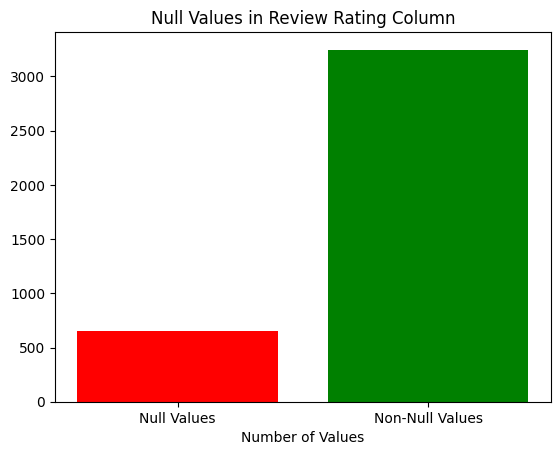

In [15]:
plt.bar(['Null Values','Non-Null Values'],[df['Review Rating'].isnull().sum(),df['Review Rating'].count()],color=['r','g'])
plt.title('Null Values in Review Rating Column')
plt.xlabel('Types of Values')
plt.xlabel('Number of Values')
plt.show()

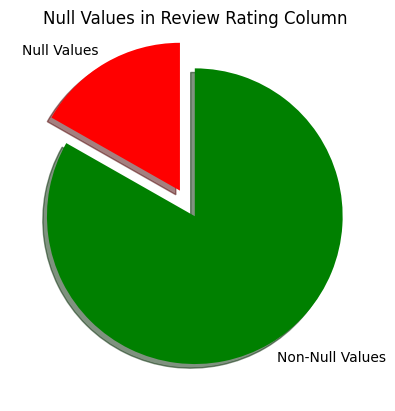

In [16]:
plt.pie([df['Review Rating'].isnull().sum(),df['Review Rating'].count()],labels=['Null Values','Non-Null Values'],startangle=90,explode=[0.2,0],shadow=True,colors=['r','g'])
plt.title('Null Values in Review Rating Column')
plt.show()

In [17]:
review_rating=dataset[:,10]
ratings={0:0, #No ratings
         1:0, #1 -> greater then 0, less then 1.5
         2:0, #2 -> greater then 1.5, less then 2.5
         3:0, #2 -> greater then 2.5, less then 3.5
         4:0, #2 -> greater then 3.5, less then 4.5
         5:0, #2 -> greater then 4.5
         }
print(review_rating)
for i in range(len(review_rating)):
  if review_rating[i]<=1.5:
    ratings[1]+=1
    review_rating[i]=1
  elif review_rating[i]<=2.5:
    ratings[2]+=1
    review_rating[i]=2
  elif review_rating[i]<=3.5:
    ratings[3]+=1
    review_rating[i]=3
  elif review_rating[i]<=4.5:
    ratings[4]+=1
    review_rating[i]=4
  elif review_rating[i]<=5:
    ratings[5]+=1
    review_rating[i]=5
  else:
    ratings[0]+=1
    review_rating[i]=0

print(review_rating)
print(ratings)

[nan nan nan ... 2.9 3.8 3.1]
[0 0 0 ... 3 4 3]
{0: 654, 1: 0, 2: 62, 3: 1315, 4: 1297, 5: 572}


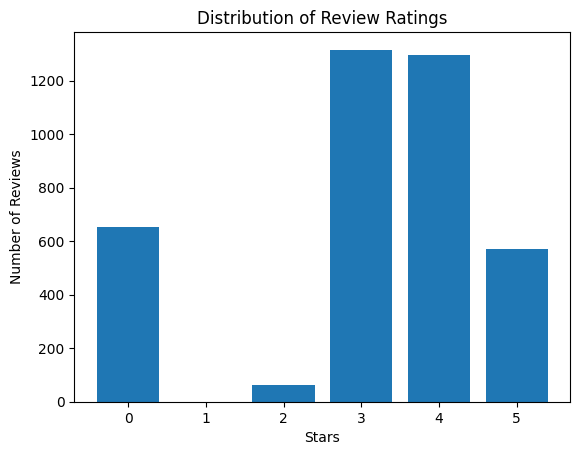

In [18]:
plt.bar(range(6),ratings.values())
plt.xlabel('Stars')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Review Ratings')
plt.show()

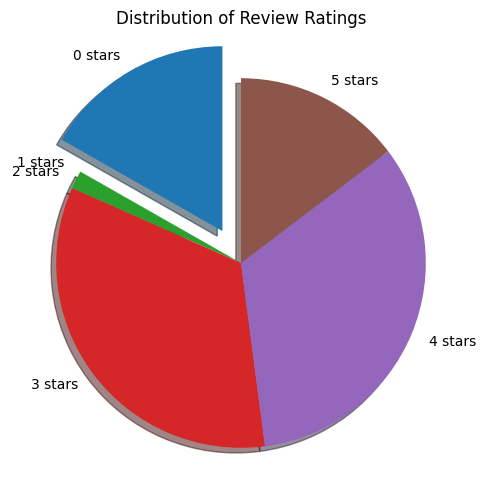

In [19]:
plt.figure(figsize=(6,6))
plt.pie(ratings.values(),labels=[f'{i} stars' for i in range(6)],startangle=90,explode=[0.2,0,0,0,0,0],shadow=True)
plt.title('Distribution of Review Ratings')
plt.show()

In [20]:
#As Review will be import for Future Analysis
#HEnce, I will remove values having 0 stars (aka nan values)
dataset=dataset[np.where(dataset[:,10] != 0)[0],:]
dataset

array([[6, 43.97399816457632, 'Male', ..., 14, 'Venmo', 'Weekly'],
       [7, 43.97399816457632, 'Male', ..., 49, 'Cash', 'Quarterly'],
       [8, 43.97399816457632, 'Male', ..., 19, 'Credit Card', 'Weekly'],
       ...,
       [3898, 46.0, 'Female', ..., 24, 'Venmo', 'Quarterly'],
       [3899, 44.0, 'Female', ..., 24, 'Venmo', 'Weekly'],
       [3900, 52.0, 'Female', ..., 33, 'Venmo', 'Quarterly']],
      dtype=object)

### Encoding categorical data

In [21]:
# Removing Coloumn 1st (Customer ID) as it is useless for analysis
dataset=dataset[:,1:]
dataset

array([[43.97399816457632, 'Male', 'Sneakers', ..., 14, 'Venmo',
        'Weekly'],
       [43.97399816457632, 'Male', 'Shirt', ..., 49, 'Cash', 'Quarterly'],
       [43.97399816457632, 'Male', 'Shorts', ..., 19, 'Credit Card',
        'Weekly'],
       ...,
       [46.0, 'Female', 'Belt', ..., 24, 'Venmo', 'Quarterly'],
       [44.0, 'Female', 'Shoes', ..., 24, 'Venmo', 'Weekly'],
       [52.0, 'Female', 'Handbag', ..., 33, 'Venmo', 'Quarterly']],
      dtype=object)

#### Gender Column

In [22]:
dataset[:,1]

array(['Male', 'Male', 'Male', ..., 'Female', 'Female', 'Female'],
      dtype=object)

In [23]:
unique_genders,gender_counts=np.unique(dataset[:,1],return_counts=True)
print(unique_genders,gender_counts)

['Female' 'Male'] [1137 2109]


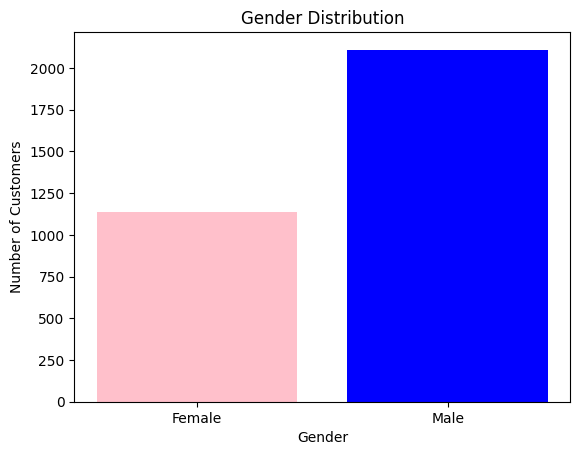

In [24]:
plt.bar(unique_genders, gender_counts, color=['pink','blue'])
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Gender Distribution')
plt.show()

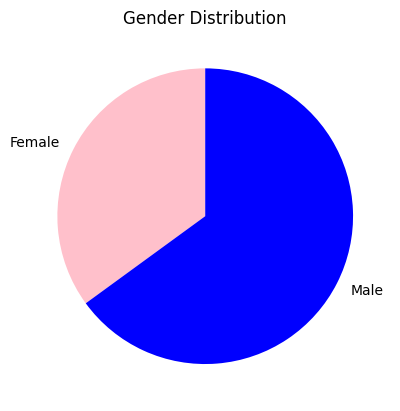

In [25]:
plt.pie(gender_counts,labels=unique_genders, colors=['pink','blue'],startangle=90)
plt.title('Gender Distribution')
plt.show()

In [26]:
le=LabelEncoder()
dataset[:,1]=np.array(le.fit_transform(dataset[:,1]))
dataset #Female -> 0 and Male -> 1

array([[43.97399816457632, 1, 'Sneakers', ..., 14, 'Venmo', 'Weekly'],
       [43.97399816457632, 1, 'Shirt', ..., 49, 'Cash', 'Quarterly'],
       [43.97399816457632, 1, 'Shorts', ..., 19, 'Credit Card', 'Weekly'],
       ...,
       [46.0, 0, 'Belt', ..., 24, 'Venmo', 'Quarterly'],
       [44.0, 0, 'Shoes', ..., 24, 'Venmo', 'Weekly'],
       [52.0, 0, 'Handbag', ..., 33, 'Venmo', 'Quarterly']], dtype=object)

In [27]:
for i in unique_genders:
  print(f"{i} : {le.transform([i])[0]}")

Female : 0
Male : 1


#### Item Purchased Column
{I am Removing it, As it will make Data Complex}

In [28]:
dataset[:,2]

array(['Sneakers', 'Shirt', 'Shorts', ..., 'Belt', 'Shoes', 'Handbag'],
      dtype=object)

In [29]:
unique_items,item_counts=np.unique(dataset[:,2],return_counts=True)
print(unique_items,item_counts)

['Backpack' 'Belt' 'Blouse' 'Boots' 'Coat' 'Dress' 'Gloves' 'Handbag'
 'Hat' 'Hoodie' 'Jacket' 'Jeans' 'Jewelry' 'Pants' 'Sandals' 'Scarf'
 'Shirt' 'Shoes' 'Shorts' 'Skirt' 'Sneakers' 'Socks' 'Sunglasses'
 'Sweater' 'T-shirt'] [124 142 146 119 127 139 112 129 122 130 140  93 141 134 135 130 146 122
 129 131 119 141 135 138 122]


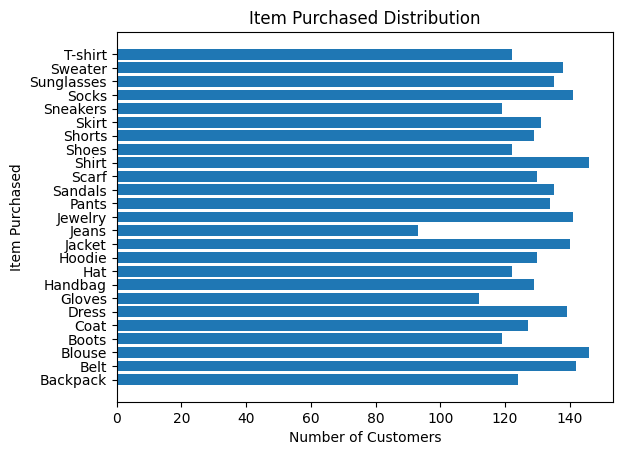

In [30]:
plt.barh(unique_items,item_counts)
plt.xlabel('Number of Customers')
plt.ylabel('Item Purchased')
plt.title('Item Purchased Distribution')
plt.show()

[]

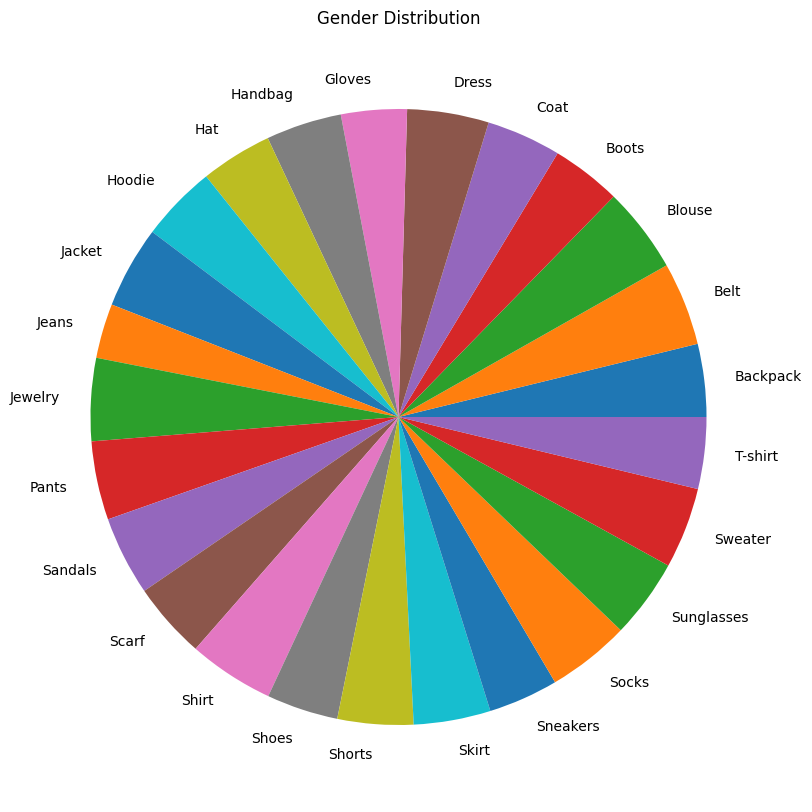

In [31]:
plt.figure(figsize=(10,10))
plt.pie(item_counts,labels=unique_items)
plt.title('Gender Distribution')
plt.plot()

In [32]:
#Removing Item Purchased Column from Dataset
dataset = np.delete(dataset,2, axis=1)
dataset

array([[43.97399816457632, 1, 'Footwear', ..., 14, 'Venmo', 'Weekly'],
       [43.97399816457632, 1, 'Clothing', ..., 49, 'Cash', 'Quarterly'],
       [43.97399816457632, 1, 'Clothing', ..., 19, 'Credit Card',
        'Weekly'],
       ...,
       [46.0, 0, 'Accessories', ..., 24, 'Venmo', 'Quarterly'],
       [44.0, 0, 'Footwear', ..., 24, 'Venmo', 'Weekly'],
       [52.0, 0, 'Accessories', ..., 33, 'Venmo', 'Quarterly']],
      dtype=object)

#### Category Column

In [33]:
dataset[:,2]

array(['Footwear', 'Clothing', 'Clothing', ..., 'Accessories', 'Footwear',
       'Accessories'], dtype=object)

In [34]:
unique_categories,category_counts=np.unique(dataset[:,2],return_counts=True)
print(unique_categories,category_counts)

['Accessories' 'Clothing' 'Footwear' 'Outerwear'] [1035 1449  495  267]


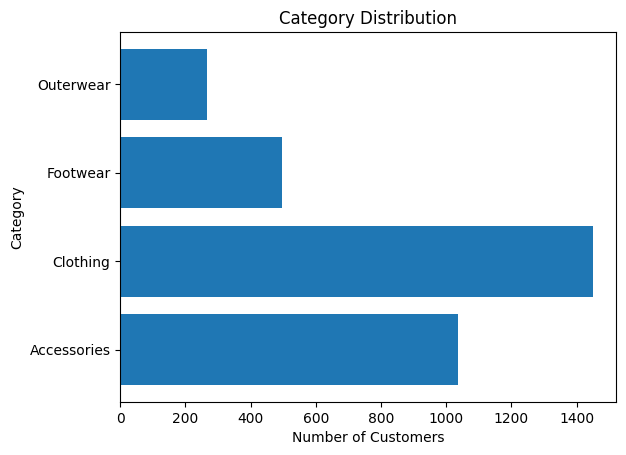

In [35]:
plt.barh(unique_categories,category_counts)
plt.xlabel('Number of Customers')
plt.ylabel('Category')
plt.title('Category Distribution')
plt.show()

[]

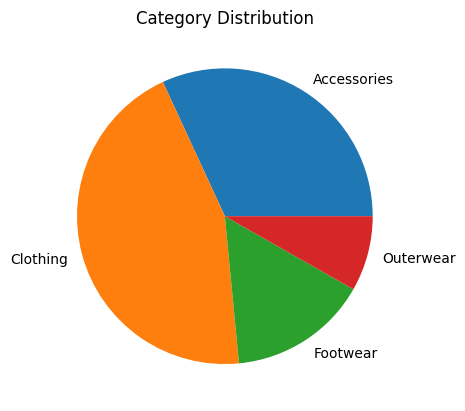

In [36]:
plt.pie(category_counts,labels=unique_categories)
plt.title('Category Distribution')
plt.plot()

In [37]:
dataset[:,2]=np.array(le.fit_transform(dataset[:,2]))
dataset

array([[43.97399816457632, 1, 2, ..., 14, 'Venmo', 'Weekly'],
       [43.97399816457632, 1, 1, ..., 49, 'Cash', 'Quarterly'],
       [43.97399816457632, 1, 1, ..., 19, 'Credit Card', 'Weekly'],
       ...,
       [46.0, 0, 0, ..., 24, 'Venmo', 'Quarterly'],
       [44.0, 0, 2, ..., 24, 'Venmo', 'Weekly'],
       [52.0, 0, 0, ..., 33, 'Venmo', 'Quarterly']], dtype=object)

In [38]:
for i in unique_categories:
  print(f"{i} : {le.transform([i])[0]}")

Accessories : 0
Clothing : 1
Footwear : 2
Outerwear : 3


#### Location Column

In [39]:
dataset[:,4]

array(['Wyoming', 'Montana', 'Louisiana', ..., 'New Jersey', 'Minnesota',
       'California'], dtype=object)

In [40]:
unique_locations,location_counts=np.unique(dataset[:,4],return_counts=True)
print(unique_locations,location_counts)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming'] [77 63 58 67 77 69 69 67 57 62 54 84 78 71 57 52 66 75 67 72 60 61 72 70
 65 78 73 72 59 53 68 70 63 66 66 62 60 63 52 58 57 65 60 56 71 57 61 63
 68 55]


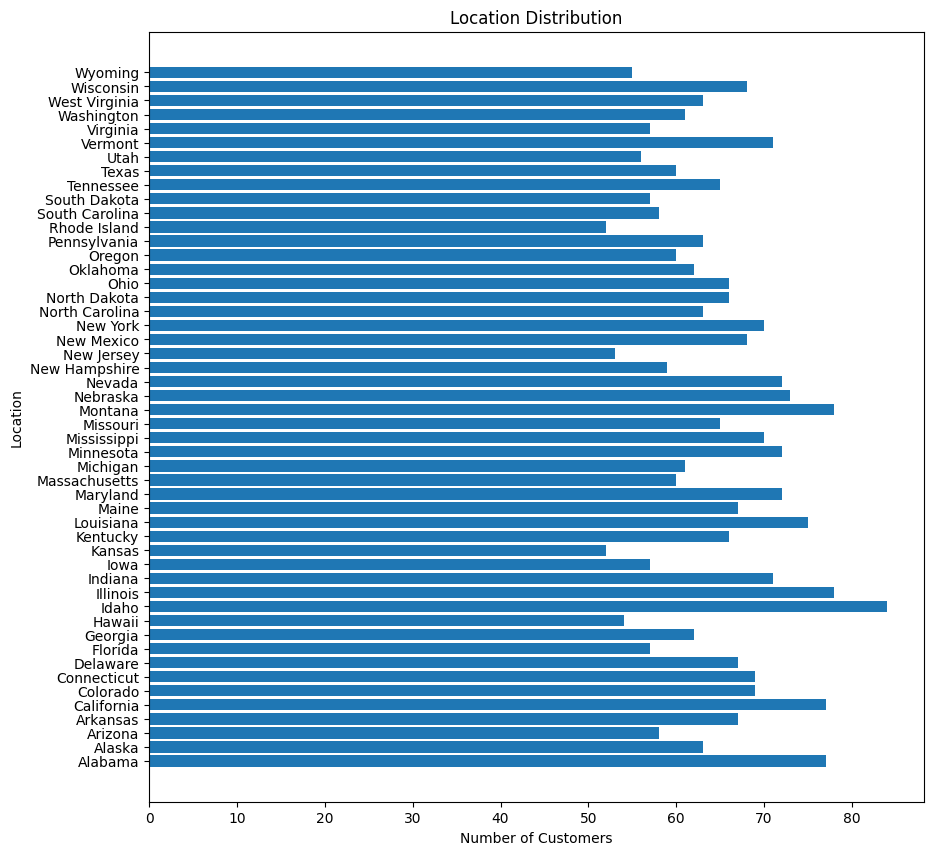

In [41]:
plt.figure(figsize=(10,10))
plt.barh(unique_locations,location_counts)
plt.xlabel('Number of Customers')
plt.ylabel('Location')
plt.title('Location Distribution')
plt.show()

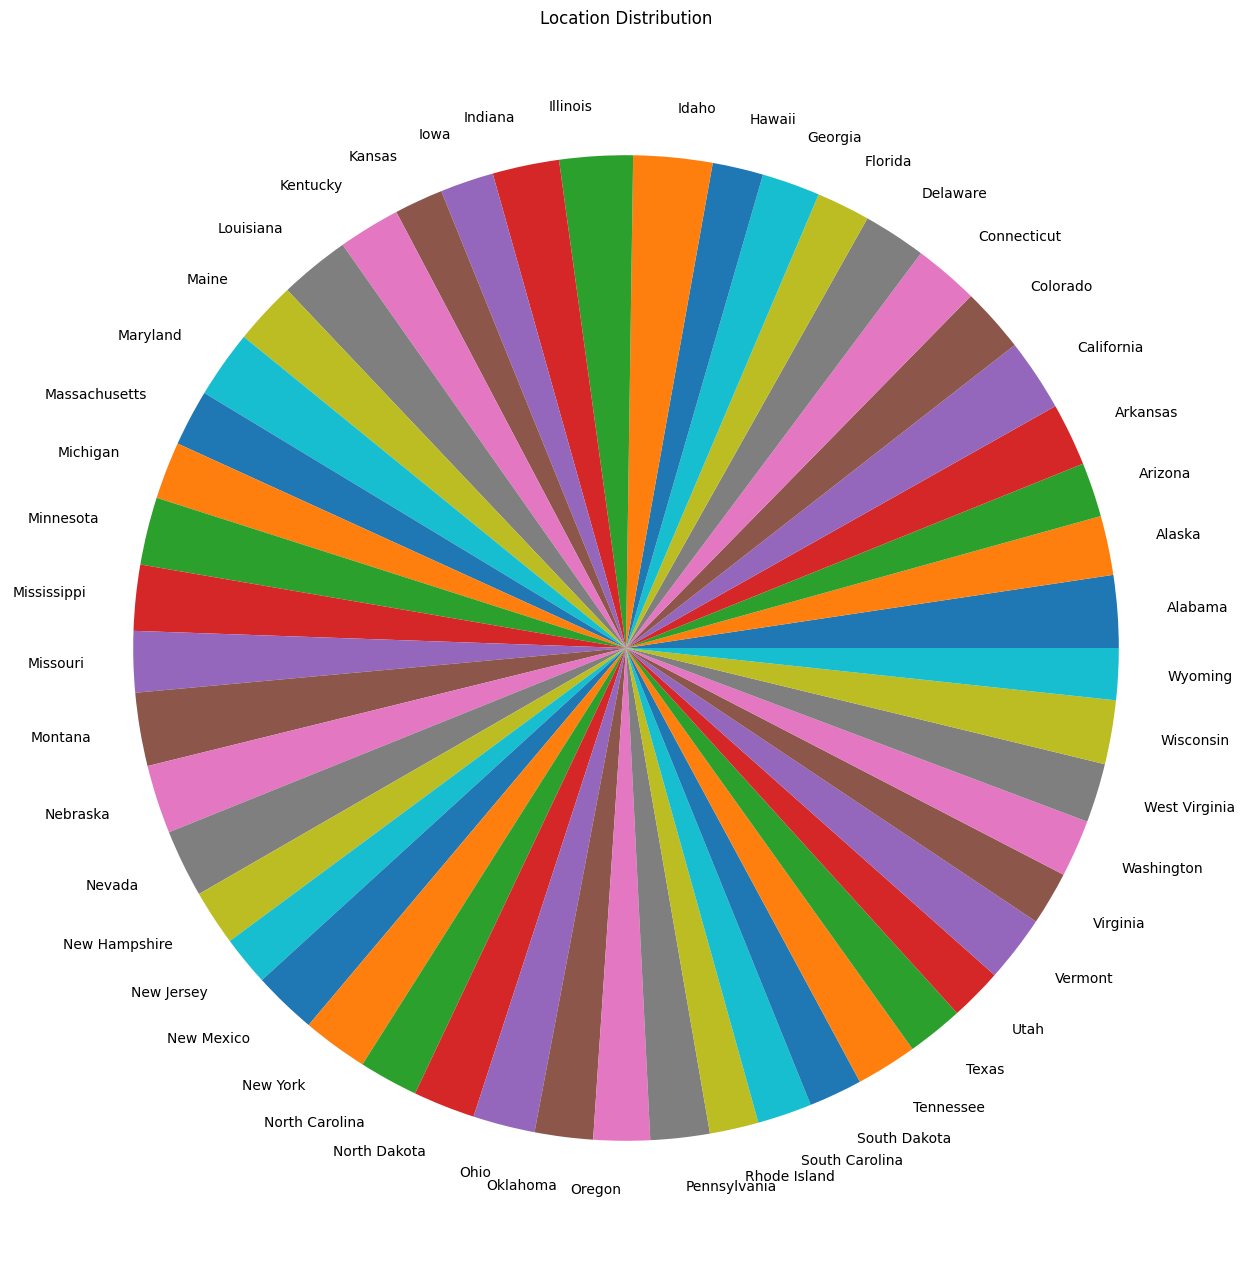

In [42]:
plt.figure(figsize=(16,16))
plt.pie(location_counts,labels=unique_locations)
plt.title("Location Distribution")
plt.show()

In [43]:
# Applying Labe Encoder on Location Column
dataset[:,4]=np.array(le.fit_transform(dataset[:,4]))
dataset[:,4]

array([49, 25, 17, ..., 29, 22, 4], dtype=object)

In [44]:
for i in unique_locations:
  print(f"{i} : {le.transform([i])[0]}")

Alabama : 0
Alaska : 1
Arizona : 2
Arkansas : 3
California : 4
Colorado : 5
Connecticut : 6
Delaware : 7
Florida : 8
Georgia : 9
Hawaii : 10
Idaho : 11
Illinois : 12
Indiana : 13
Iowa : 14
Kansas : 15
Kentucky : 16
Louisiana : 17
Maine : 18
Maryland : 19
Massachusetts : 20
Michigan : 21
Minnesota : 22
Mississippi : 23
Missouri : 24
Montana : 25
Nebraska : 26
Nevada : 27
New Hampshire : 28
New Jersey : 29
New Mexico : 30
New York : 31
North Carolina : 32
North Dakota : 33
Ohio : 34
Oklahoma : 35
Oregon : 36
Pennsylvania : 37
Rhode Island : 38
South Carolina : 39
South Dakota : 40
Tennessee : 41
Texas : 42
Utah : 43
Vermont : 44
Virginia : 45
Washington : 46
West Virginia : 47
Wisconsin : 48
Wyoming : 49


#### Size Column

In [45]:
dataset[:,5]

array(['M', 'M', 'L', ..., 'L', 'S', 'M'], dtype=object)

In [46]:
unique_sizes,size_counts=np.unique(dataset[:,5],return_counts=True)
print(unique_sizes,size_counts)

['L' 'M' 'S' 'XL'] [ 863 1466  567  350]


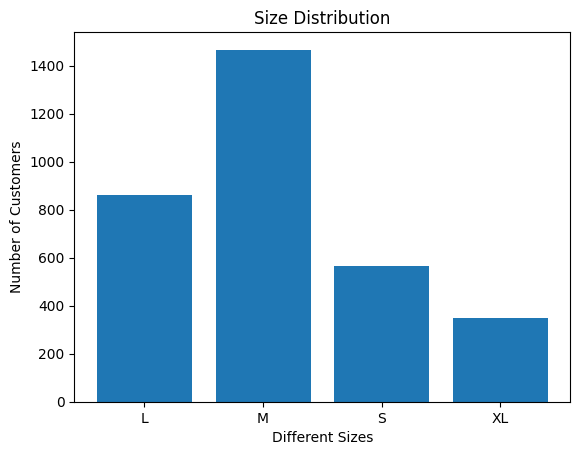

In [47]:
plt.bar(unique_sizes,size_counts)
plt.xlabel("Different Sizes")
plt.ylabel("Number of Customers")
plt.title("Size Distribution")
plt.show()

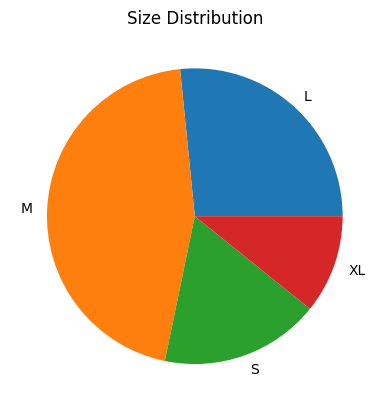

In [48]:
plt.pie(size_counts,labels=unique_sizes)
plt.title("Size Distribution")
plt.show()

In [49]:
#appying label encoding
dataset[:,5]=le.fit_transform(dataset[:,5])
dataset[:,5]

array([1, 1, 0, ..., 0, 2, 1], dtype=object)

In [50]:
for i in unique_sizes:
  print(f"{i:2s} : {le.transform([i])[0]}")

L  : 0
M  : 1
S  : 2
XL : 3


#### Color Column

In [51]:
dataset[:,6]

array(['White', 'Gray', 'Charcoal', ..., 'Green', 'Brown', 'Beige'],
      dtype=object)

In [52]:
unique_colors,color_counts=np.unique(dataset[:,6],return_counts=True)
print(unique_colors,color_counts)

['Beige' 'Black' 'Blue' 'Brown' 'Charcoal' 'Cyan' 'Gold' 'Gray' 'Green'
 'Indigo' 'Lavender' 'Magenta' 'Maroon' 'Olive' 'Orange' 'Peach' 'Pink'
 'Purple' 'Red' 'Silver' 'Teal' 'Turquoise' 'Violet' 'White' 'Yellow'] [126 140 128 123 135 143 119 131 140 125 126 123 132 139 125 125 126 128
 123 147 133 114 142 114 139]


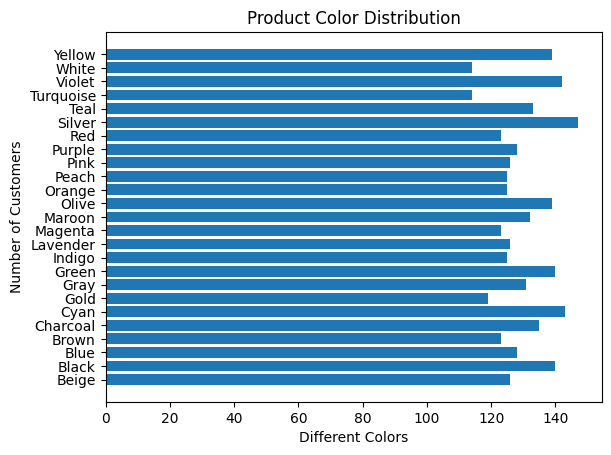

In [53]:
plt.barh(unique_colors,color_counts)
plt.xlabel("Different Colors")
plt.ylabel("Number of Customers")
plt.title("Product Color Distribution")
plt.show()

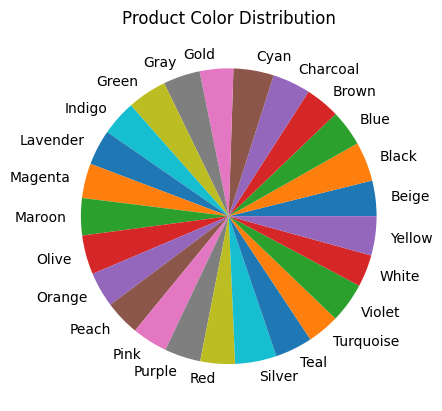

In [54]:
plt.pie(color_counts,labels=unique_colors)
plt.title("Product Color Distribution")
plt.show()

In [55]:
#applying Label Encoding
dataset[:,6]=le.fit_transform(dataset[:,6])
dataset[:,6]

array([23, 7, 4, ..., 8, 3, 0], dtype=object)

In [56]:
for i in unique_colors:
  print(f"{i:2s} : {le.transform([i])[0]}")

Beige : 0
Black : 1
Blue : 2
Brown : 3
Charcoal : 4
Cyan : 5
Gold : 6
Gray : 7
Green : 8
Indigo : 9
Lavender : 10
Magenta : 11
Maroon : 12
Olive : 13
Orange : 14
Peach : 15
Pink : 16
Purple : 17
Red : 18
Silver : 19
Teal : 20
Turquoise : 21
Violet : 22
White : 23
Yellow : 24


#### Season Column

In [57]:
dataset[:,7]

array(['Summer', 'Fall', 'Winter', ..., 'Spring', 'Summer', 'Spring'],
      dtype=object)

In [58]:
unique_seasons,season_counts=np.unique(dataset[:,7],return_counts=True)
print(unique_seasons,season_counts)

['Fall' 'Spring' 'Summer' 'Winter'] [812 835 778 821]


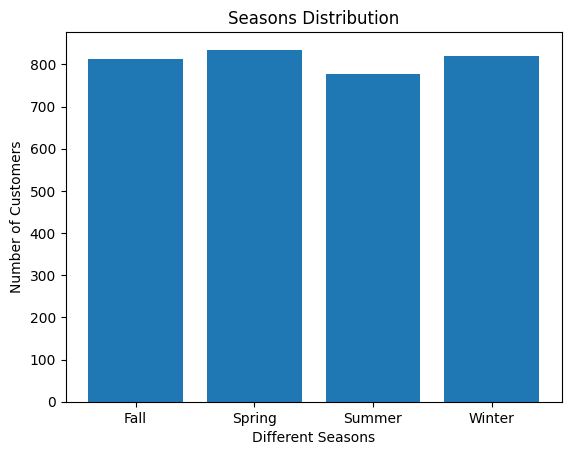

In [59]:
plt.bar(unique_seasons,season_counts)
plt.xlabel("Different Seasons")
plt.ylabel("Number of Customers")
plt.title("Seasons Distribution")
plt.show()

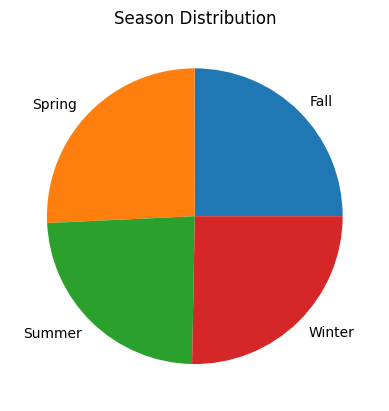

In [60]:
plt.pie(season_counts,labels=unique_seasons)
plt.title("Season Distribution")
plt.show()

In [61]:
#applying Label Encoding
dataset[:,7]=le.fit_transform(dataset[:,7])
dataset[:,7]

array([2, 0, 3, ..., 1, 2, 1], dtype=object)

In [62]:
for i in unique_seasons:
  print(f"{i:2s} : {le.transform([i])[0]}")

Fall : 0
Spring : 1
Summer : 2
Winter : 3


#### Subscription Status

In [63]:
dataset[:,9]

array(['Yes', 'Of course', 'Yes', ..., 'No', 'N', 'No'], dtype=object)

In [64]:
np.unique(dataset[:,9])

array(['FALSE', 'Haan', 'Haanji', 'Indeed', 'N', 'Naaji', 'Nah', 'Nakko',
       'No', 'Nope', 'Of course', 'TRUE', 'Y', 'Yes', 'Yo', 'ille', 'n',
       'y', 'yep'], dtype=object)

In [65]:
subscription=dataset[:,9]
count_subscription={0:0,1:0}

for i in range(subscription.size):
  if subscription[i] in ['Haan','Haanji','Indeed','Of course','TRUE','Y','Yes','Yo','y','yep']:
    subscription[i]=1
    count_subscription[1]+=1
  else:
    subscription[i]=0
    count_subscription[0]+=1

count_subscription

{0: 2620, 1: 626}

In [66]:
dataset[:,9]

array([1, 1, 1, ..., 0, 0, 0], dtype=object)

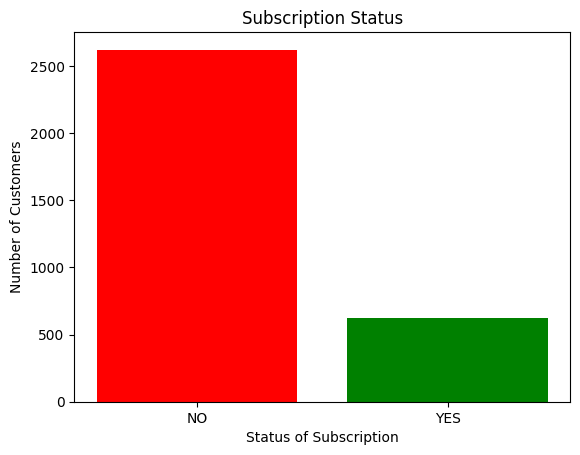

In [67]:
plt.bar(["NO","YES"],count_subscription.values(),color=['r','g'])
plt.xlabel("Status of Subscription")
plt.ylabel("Number of Customers")
plt.title("Subscription Status")
plt.show()

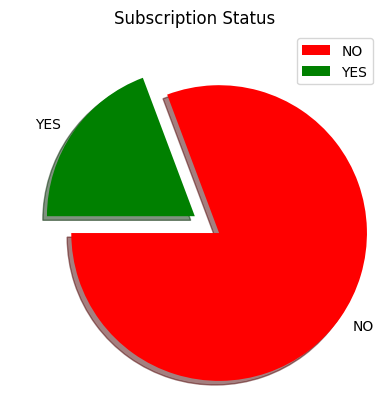

In [68]:
plt.pie(count_subscription.values(),labels=["NO","YES"],colors=['r','g'],startangle=180,explode=[0.2,0],shadow=True)
plt.title("Subscription Status")
plt.legend()
plt.show()

#### Discount Applied Column

In [69]:
dataset[:,12]

array(['Yes', 'Yes', 'Yes', ..., 'n', 'Nakko', 'No'], dtype=object)

In [70]:
np.unique(dataset[:,12])

array(['FALSE', 'Haan', 'Haanji', 'Indeed', 'N', 'Naaji', 'Nah', 'Nakko',
       'No', 'Nope', 'Of course', 'TRUE', 'Y', 'Yes', 'Yo', 'ille', 'n',
       'y', 'yep'], dtype=object)

In [71]:
discount=dataset[:,12]
count_discount={0:0,1:0}

for i in range(discount.size):
  if discount[i] in ['Haan','Haanji','Indeed','Of course','TRUE','Y','Yes','Yo','y','yep']:
    discount[i]=1
    count_discount[1]+=1
  else:
    discount[i]=0
    count_discount[0]+=1

count_discount

{0: 2037, 1: 1209}

In [72]:
dataset[:,12]

array([1, 1, 1, ..., 0, 0, 0], dtype=object)

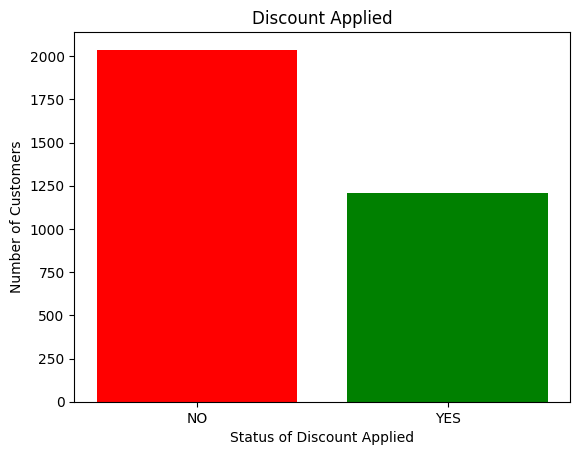

In [73]:
plt.bar(["NO","YES"],count_discount.values(),color=['r','g'])
plt.xlabel("Status of Discount Applied")
plt.ylabel("Number of Customers")
plt.title("Discount Applied")
plt.show()

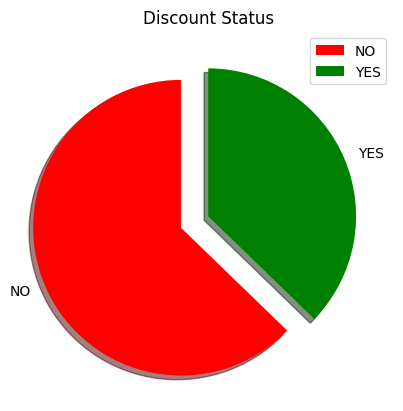

In [74]:
plt.pie(count_discount.values(),labels=["NO","YES"],colors=['r','g'],startangle=90,explode=[0.2,0],shadow=True)
plt.title("Discount Status")
plt.legend()
plt.show()

#### Promo Code Used Column

In [75]:
dataset[:,13]

array(['Haanji', 'Yes', 'Yes', ..., 'No', 'No', 'Nope'], dtype=object)

In [76]:
np.unique(dataset[:,13])

array(['FALSE', 'Haan', 'Haanji', 'Indeed', 'N', 'Naaji', 'Nah', 'Nakko',
       'No', 'Nope', 'Of course', 'TRUE', 'Y', 'Yes', 'Yo', 'ille', 'n',
       'y', 'yep'], dtype=object)

In [77]:
promo=dataset[:,13]
count_promo={0:0,1:0}

for i in range(promo.size):
  if promo[i] in ['Haan','Haanji','Indeed','Of course','TRUE','Y','Yes','Yo','y','yep']:
    promo[i]=1
    count_promo[1]+=1
  else:
    promo[i]=0
    count_promo[0]+=1

count_promo

{0: 2037, 1: 1209}

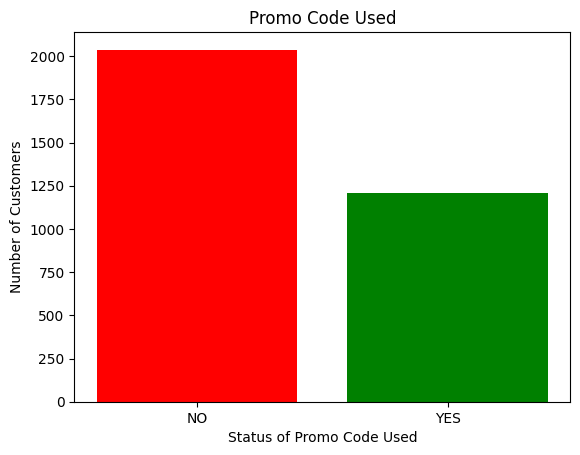

In [78]:
plt.bar(["NO","YES"],count_promo.values(),color=['r','g'])
plt.xlabel("Status of Promo Code Used")
plt.ylabel("Number of Customers")
plt.title("Promo Code Used")
plt.show()

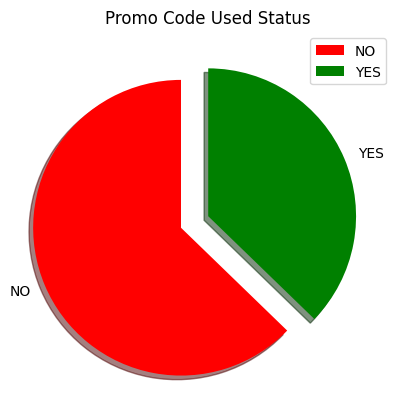

In [79]:
plt.pie(count_promo.values(),labels=["NO","YES"],colors=['r','g'],startangle=90,explode=[0.2,0],shadow=True)
plt.title("Promo Code Used Status")
plt.legend()
plt.show()

#### One Hot Encoding Using Pandas
{On Columns: <b>Payment Method</b> , <b> Shipping Type</b> , <b>Preferred Payment Method</b> and <b>Frequency of Purchases</b>}

In [80]:
updated_features_list = [
    'Age', 'Gender', 'Category', 'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
    'Review Rating', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied',
    'Promo Code Used', 'Previous Purchases', 'Preferred Payment Method', 'Frequency of Purchases'
]
ndf=pd.DataFrame(dataset, columns =updated_features_list)

In [81]:
ndf

,Age,Gender,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,43.973998,1,2,59.863014,49,1,23,2,3,1,Venmo,Standard,1,1,14,Venmo,Weekly
1,43.973998,1,1,59.863014,25,1,7,0,3,1,Debit Card,Free Shipping,1,1,49,Cash,Quarterly
2,43.973998,1,1,59.863014,17,0,4,3,3,1,Debit Card,Free Shipping,1,1,19,Credit Card,Weekly
3,43.973998,1,2,59.863014,3,0,17,0,4,1,Credit Card,Store Pickup,1,1,26,Bank Transfer,Bi-Weekly
4,43.973998,1,1,59.863014,10,2,13,3,5,1,PayPal,Store Pickup,1,1,10,Bank Transfer,Fortnightly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3241,40.0,0,1,28.0,45,0,21,2,4,0,Cash,2-Day Shipping,0,0,32,Venmo,Weekly
3242,52.0,0,0,49.0,14,0,23,1,4,0,PayPal,Store Pickup,0,0,41,Bank Transfer,Bi-Weekly
3243,46.0,0,0,33.0,29,0,8,1,3,0,Credit Card,Standard,0,0,24,Venmo,Quarterly
3244,44.0,0,2,77.0,22,2,3,2,4,0,PayPal,Express,0,0,24,Venmo,Weekly


In [82]:
data = pd.get_dummies(ndf, columns = ['Payment Method','Shipping Type','Preferred Payment Method','Frequency of Purchases'])
data

,Age,Gender,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,...,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,43.973998,1,2,59.863014,49,1,23,2,3,1,...,0,0,1,0,0,0,0,0,0,1
1,43.973998,1,1,59.863014,25,1,7,0,3,1,...,0,0,0,0,0,0,0,0,1,0
2,43.973998,1,1,59.863014,17,0,4,3,3,1,...,0,0,0,0,0,0,0,0,0,1
3,43.973998,1,2,59.863014,3,0,17,0,4,1,...,0,0,0,0,1,0,0,0,0,0
4,43.973998,1,1,59.863014,10,2,13,3,5,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3241,40.0,0,1,28.0,45,0,21,2,4,0,...,0,0,1,0,0,0,0,0,0,1
3242,52.0,0,0,49.0,14,0,23,1,4,0,...,0,0,0,0,1,0,0,0,0,0
3243,46.0,0,0,33.0,29,0,8,1,3,0,...,0,0,1,0,0,0,0,0,1,0
3244,44.0,0,2,77.0,22,2,3,2,4,0,...,0,0,1,0,0,0,0,0,0,1


## Step 2: Converting into Analysing Data

In [83]:
#This is the Perfect Data type we can use for UnSupervised Models
data

,Age,Gender,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,...,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,43.973998,1,2,59.863014,49,1,23,2,3,1,...,0,0,1,0,0,0,0,0,0,1
1,43.973998,1,1,59.863014,25,1,7,0,3,1,...,0,0,0,0,0,0,0,0,1,0
2,43.973998,1,1,59.863014,17,0,4,3,3,1,...,0,0,0,0,0,0,0,0,0,1
3,43.973998,1,2,59.863014,3,0,17,0,4,1,...,0,0,0,0,1,0,0,0,0,0
4,43.973998,1,1,59.863014,10,2,13,3,5,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3241,40.0,0,1,28.0,45,0,21,2,4,0,...,0,0,1,0,0,0,0,0,0,1
3242,52.0,0,0,49.0,14,0,23,1,4,0,...,0,0,0,0,1,0,0,0,0,0
3243,46.0,0,0,33.0,29,0,8,1,3,0,...,0,0,1,0,0,0,0,0,1,0
3244,44.0,0,2,77.0,22,2,3,2,4,0,...,0,0,1,0,0,0,0,0,0,1


### Convertion of Data for Analysis
{For Analysis,I will not Categorical data.<br>
Hence I am converting all Column using Label Encoding}

#### Payment Method Colounm

In [84]:
dataset[:,10]

array(['Venmo', 'Debit Card', 'Debit Card', ..., 'Credit Card', 'PayPal',
       'Bank Transfer'], dtype=object)

In [85]:
unique_payments,payment_counts=np.unique(dataset[:,10],return_counts=True)
print(unique_payments,payment_counts)

['Bank Transfer' 'Cash' 'Credit Card' 'Debit Card' 'PayPal' 'Venmo'] [528 544 568 524 535 547]


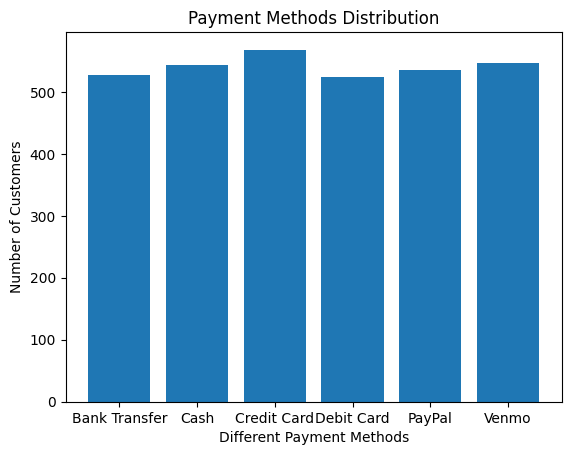

In [86]:
plt.bar(unique_payments,payment_counts)
plt.xlabel("Different Payment Methods")
plt.ylabel("Number of Customers")
plt.title("Payment Methods Distribution")
plt.show()

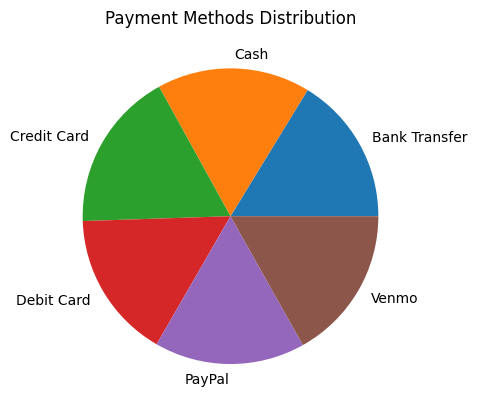

In [87]:
plt.pie(payment_counts,labels=unique_payments)
plt.title("Payment Methods Distribution")
plt.show()

In [88]:
#applying Label Encoding
dataset[:,10]=le.fit_transform(dataset[:,10])
dataset[:,10]

array([5, 3, 3, ..., 2, 4, 0], dtype=object)

In [89]:
for i in unique_payments:
  print(f"{i} : {le.transform([i])[0]}")

Bank Transfer : 0
Cash : 1
Credit Card : 2
Debit Card : 3
PayPal : 4
Venmo : 5


#### Shipping Column

In [90]:
dataset[:,11]

array(['Standard', 'Free Shipping', 'Free Shipping', ..., 'Standard',
       'Express', 'Store Pickup'], dtype=object)

In [91]:
unique_ships,ship_counts=np.unique(dataset[:,11],return_counts=True)
print(unique_ships,ship_counts)

['2-Day Shipping' 'Express' 'Free Shipping' 'Next Day Air' 'Standard'
 'Store Pickup'] [529 546 554 544 550 523]


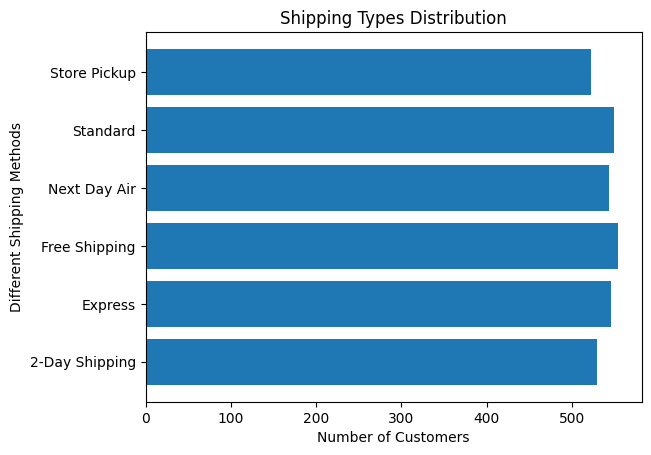

In [92]:
plt.barh(unique_ships,ship_counts)
plt.ylabel("Different Shipping Methods")
plt.xlabel("Number of Customers")
plt.title("Shipping Types Distribution")
plt.show()

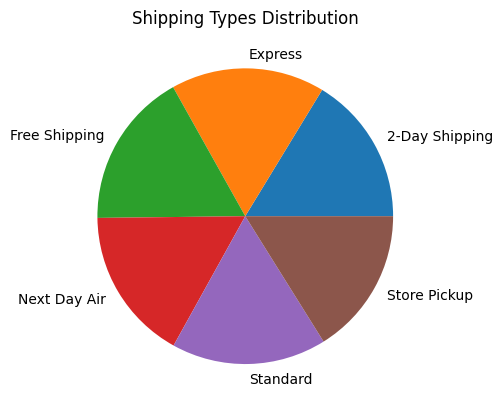

In [93]:
plt.pie(ship_counts,labels=unique_ships)
plt.title("Shipping Types Distribution")
plt.show()

In [94]:
#applying Label Encoding
dataset[:,11]=le.fit_transform(dataset[:,11])
dataset[:,11]

array([4, 2, 2, ..., 4, 1, 5], dtype=object)

In [95]:
for i in unique_ships:
  print(f"{i} : {le.transform([i])[0]}")

2-Day Shipping : 0
Express : 1
Free Shipping : 2
Next Day Air : 3
Standard : 4
Store Pickup : 5


#### Preferred Payment Method Column

In [96]:
dataset[:,15]

array(['Venmo', 'Cash', 'Credit Card', ..., 'Venmo', 'Venmo', 'Venmo'],
      dtype=object)

In [97]:
unique_pre_payments,pre_payment_counts=np.unique(dataset[:,15],return_counts=True)
print(unique_pre_payments,pre_payment_counts)

['Bank Transfer' 'Cash' 'Credit Card' 'Debit Card' 'PayPal' 'Venmo'] [509 564 563 521 554 535]


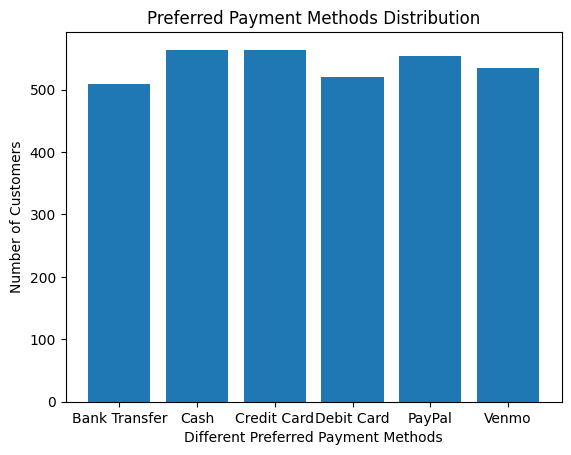

In [98]:
plt.bar(unique_pre_payments,pre_payment_counts)
plt.xlabel("Different Preferred Payment Methods")
plt.ylabel("Number of Customers")
plt.title("Preferred Payment Methods Distribution")
plt.show()

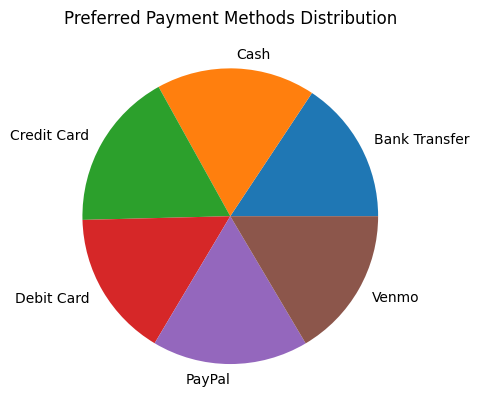

In [99]:
plt.pie(pre_payment_counts,labels=unique_pre_payments)
plt.title("Preferred Payment Methods Distribution")
plt.show()

In [100]:
#applying Label Encoding
dataset[:,15]=le.fit_transform(dataset[:,15])
dataset[:,15]

array([5, 1, 2, ..., 5, 5, 5], dtype=object)

In [101]:
for i in unique_pre_payments:
  print(f"{i} : {le.transform([i])[0]}")

Bank Transfer : 0
Cash : 1
Credit Card : 2
Debit Card : 3
PayPal : 4
Venmo : 5


#### Frequency of Purchases Column

In [102]:
dataset[:,-1]

array(['Weekly', 'Quarterly', 'Weekly', ..., 'Quarterly', 'Weekly',
       'Quarterly'], dtype=object)

In [103]:
unique_frequencies,frequency_counts=np.unique(dataset[:,-1],return_counts=True)
print(unique_frequencies,frequency_counts)

['Annually' 'Bi-Weekly' 'Every 3 Months' 'Fortnightly' 'Monthly'
 'Quarterly' 'Weekly'] [454 465 495 452 459 473 448]


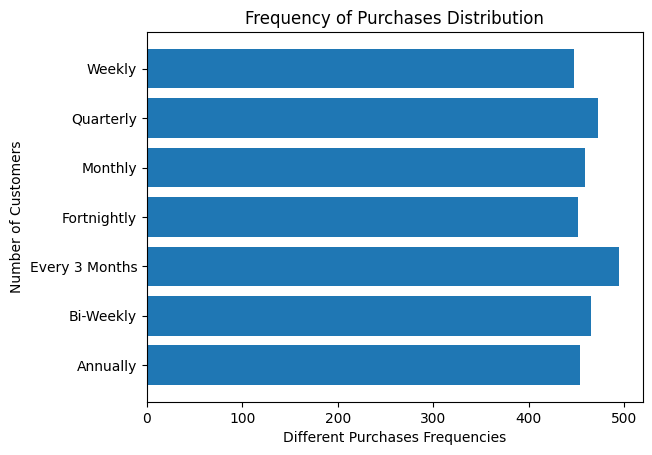

In [104]:
plt.barh(unique_frequencies,frequency_counts)
plt.xlabel("Different Purchases Frequencies")
plt.ylabel("Number of Customers")
plt.title("Frequency of Purchases Distribution")
plt.show()

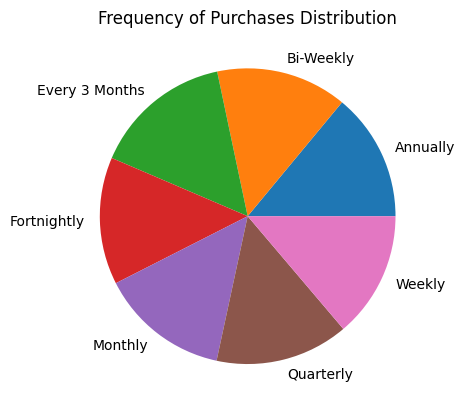

In [105]:
plt.pie(frequency_counts,labels=unique_frequencies)
plt.title("Frequency of Purchases Distribution")
plt.show()

In [106]:
#applying Label Encoding
dataset[:,-1]=le.fit_transform(dataset[:,-1])
dataset[:,-1]

array([6, 5, 6, ..., 5, 6, 5], dtype=object)

In [107]:
for i in unique_frequencies:
  print(f"{i} : {le.transform([i])[0]}")

Annually : 0
Bi-Weekly : 1
Every 3 Months : 2
Fortnightly : 3
Monthly : 4
Quarterly : 5
Weekly : 6


### Converting into Pandas DatFrame

In [108]:
updated_features_list = [
    'Age', 'Gender', 'Category', 'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
    'Review Rating', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied',
    'Promo Code Used', 'Previous Purchases', 'Preferred Payment Method', 'Frequency of Purchases'
]
analysis_df=pd.DataFrame(dataset, columns =updated_features_list)

In [109]:
analysis_df

,Age,Gender,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,43.973998,1,2,59.863014,49,1,23,2,3,1,5,4,1,1,14,5,6
1,43.973998,1,1,59.863014,25,1,7,0,3,1,3,2,1,1,49,1,5
2,43.973998,1,1,59.863014,17,0,4,3,3,1,3,2,1,1,19,2,6
3,43.973998,1,2,59.863014,3,0,17,0,4,1,2,5,1,1,26,0,1
4,43.973998,1,1,59.863014,10,2,13,3,5,1,4,5,1,1,10,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3241,40.0,0,1,28.0,45,0,21,2,4,0,1,0,0,0,32,5,6
3242,52.0,0,0,49.0,14,0,23,1,4,0,4,5,0,0,41,0,1
3243,46.0,0,0,33.0,29,0,8,1,3,0,2,4,0,0,24,5,5
3244,44.0,0,2,77.0,22,2,3,2,4,0,4,1,0,0,24,5,6


## Step 3: Analysing Data

#### Gender and Age

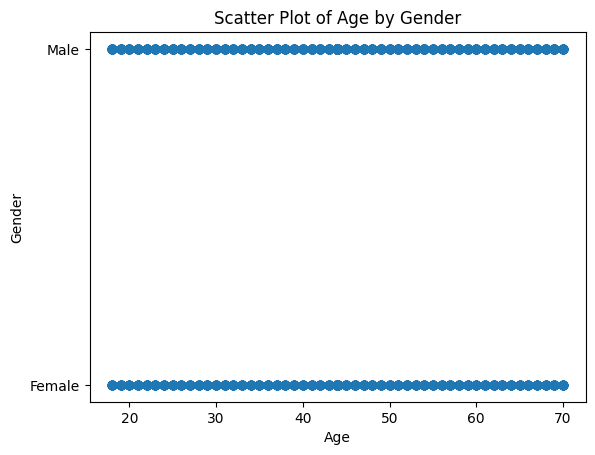

In [110]:
plt.scatter(analysis_df['Age'], analysis_df['Gender'])
plt.title('Scatter Plot of Age by Gender')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.yticks([0,1],["Female","Male"])
plt.show()

### Category and Purchase Amount (USD)

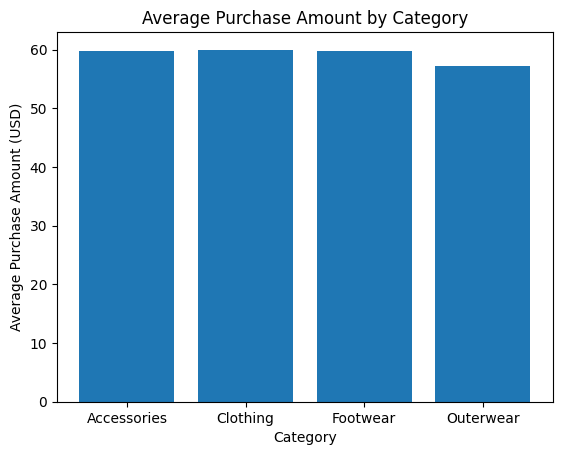

In [111]:
#Average Purchased Amount from Each Category
plt.bar(['Accessories','Clothing','Footwear','Outerwear'],analysis_df.groupby('Category')['Purchase Amount (USD)'].mean())
plt.title('Average Purchase Amount by Category')
plt.xlabel('Category')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

In [112]:
analysis_df.groupby('Category')['Purchase Amount (USD)'].mean()

Category
0    59.874727
1    60.011231
2    59.747309
3    57.240675
Name: Purchase Amount (USD), dtype: float64

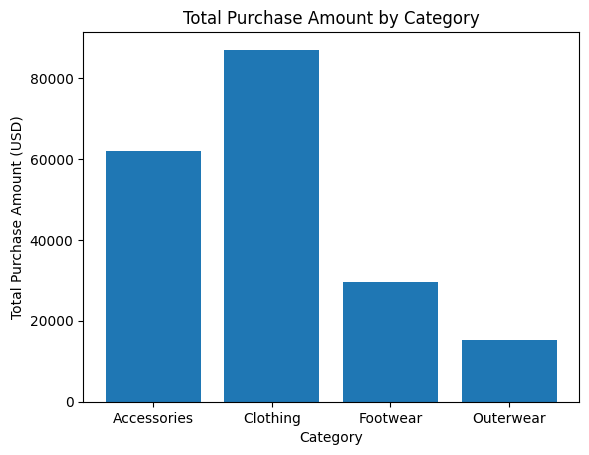

In [113]:
#Total Purchased Amount from Each Category
plt.bar(['Accessories','Clothing','Footwear','Outerwear'],analysis_df.groupby('Category')['Purchase Amount (USD)'].sum())
plt.title('Total Purchase Amount by Category')
plt.xlabel('Category')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()

### Location and Previous Purchases

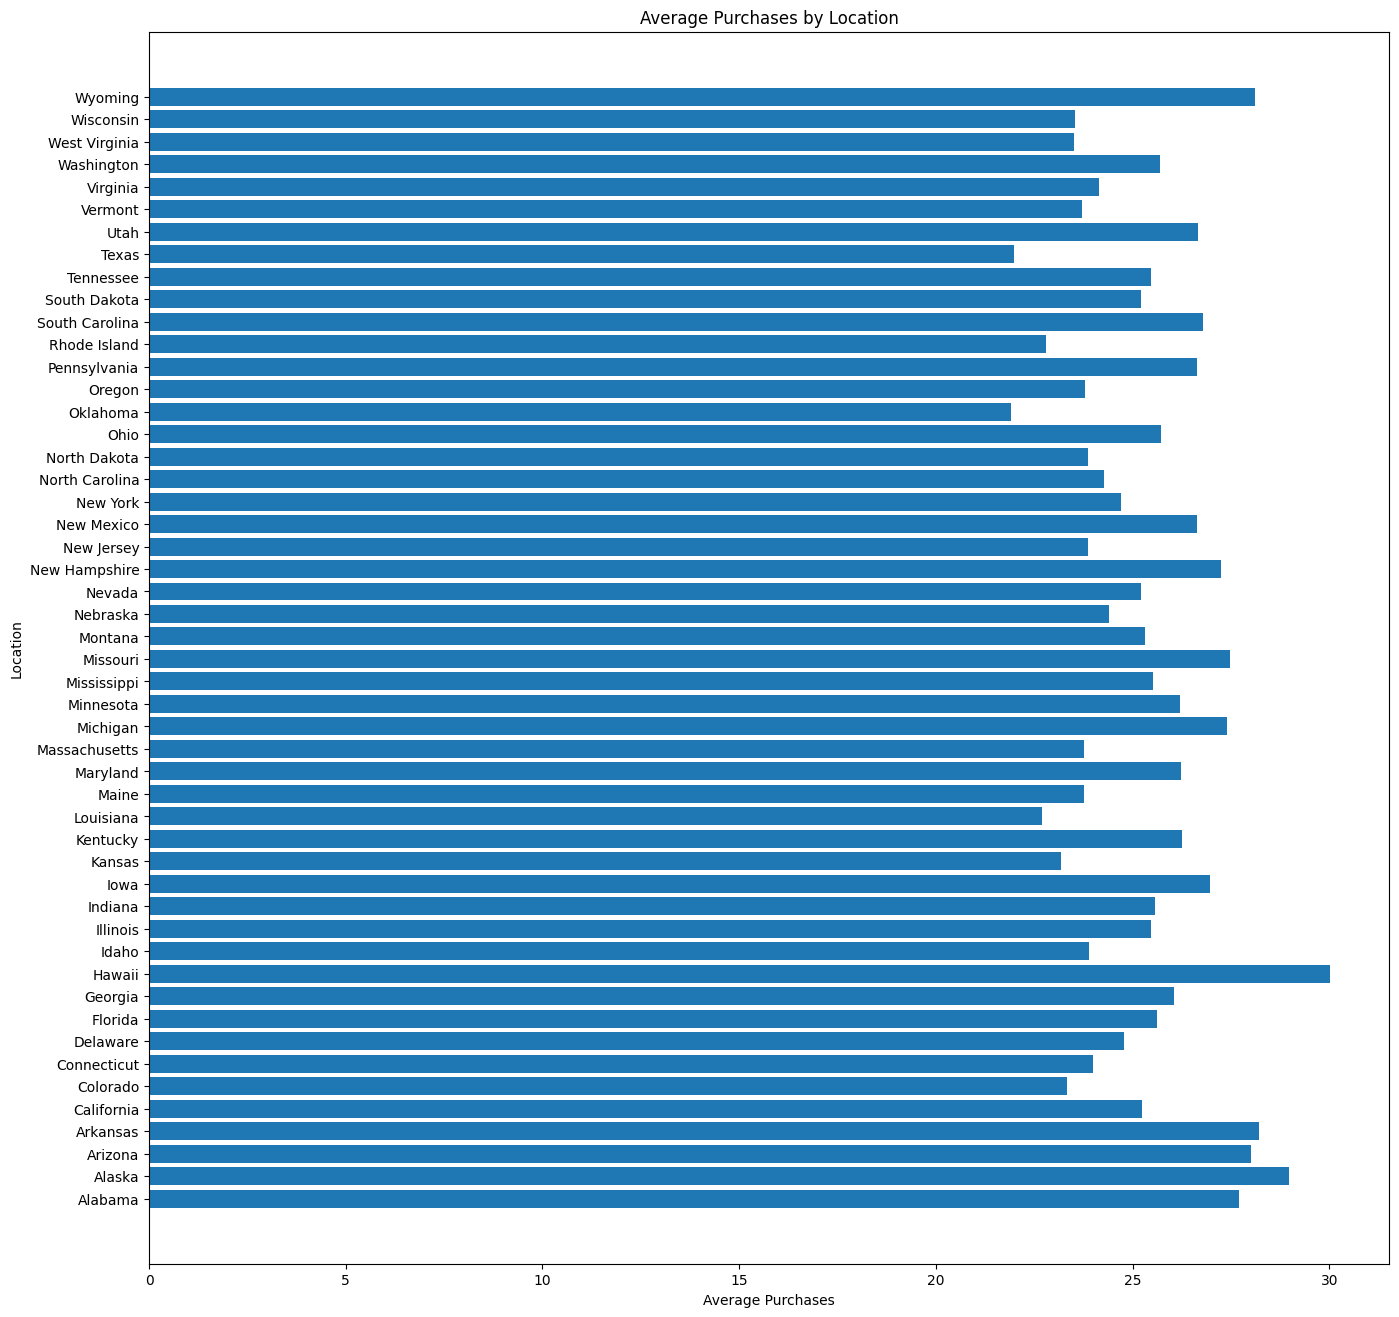

In [114]:
#Average Purchases from Each State
plt.figure(figsize=(16,16))
plt.barh(unique_locations,analysis_df.groupby('Location')['Previous Purchases'].mean())
plt.title('Average Purchases by Location')
plt.ylabel('Location')
plt.xlabel('Average Purchases')
plt.show()

In [115]:
location_pre_pruchase_mean=np.column_stack((unique_locations,np.array(analysis_df.groupby('Location')['Previous Purchases'].mean())))
location_pre_pruchase_mean[:,:][location_pre_pruchase_mean[:,1]==np.max(location_pre_pruchase_mean[:,1])]

array([['Hawaii', 30.01851851851852]], dtype=object)

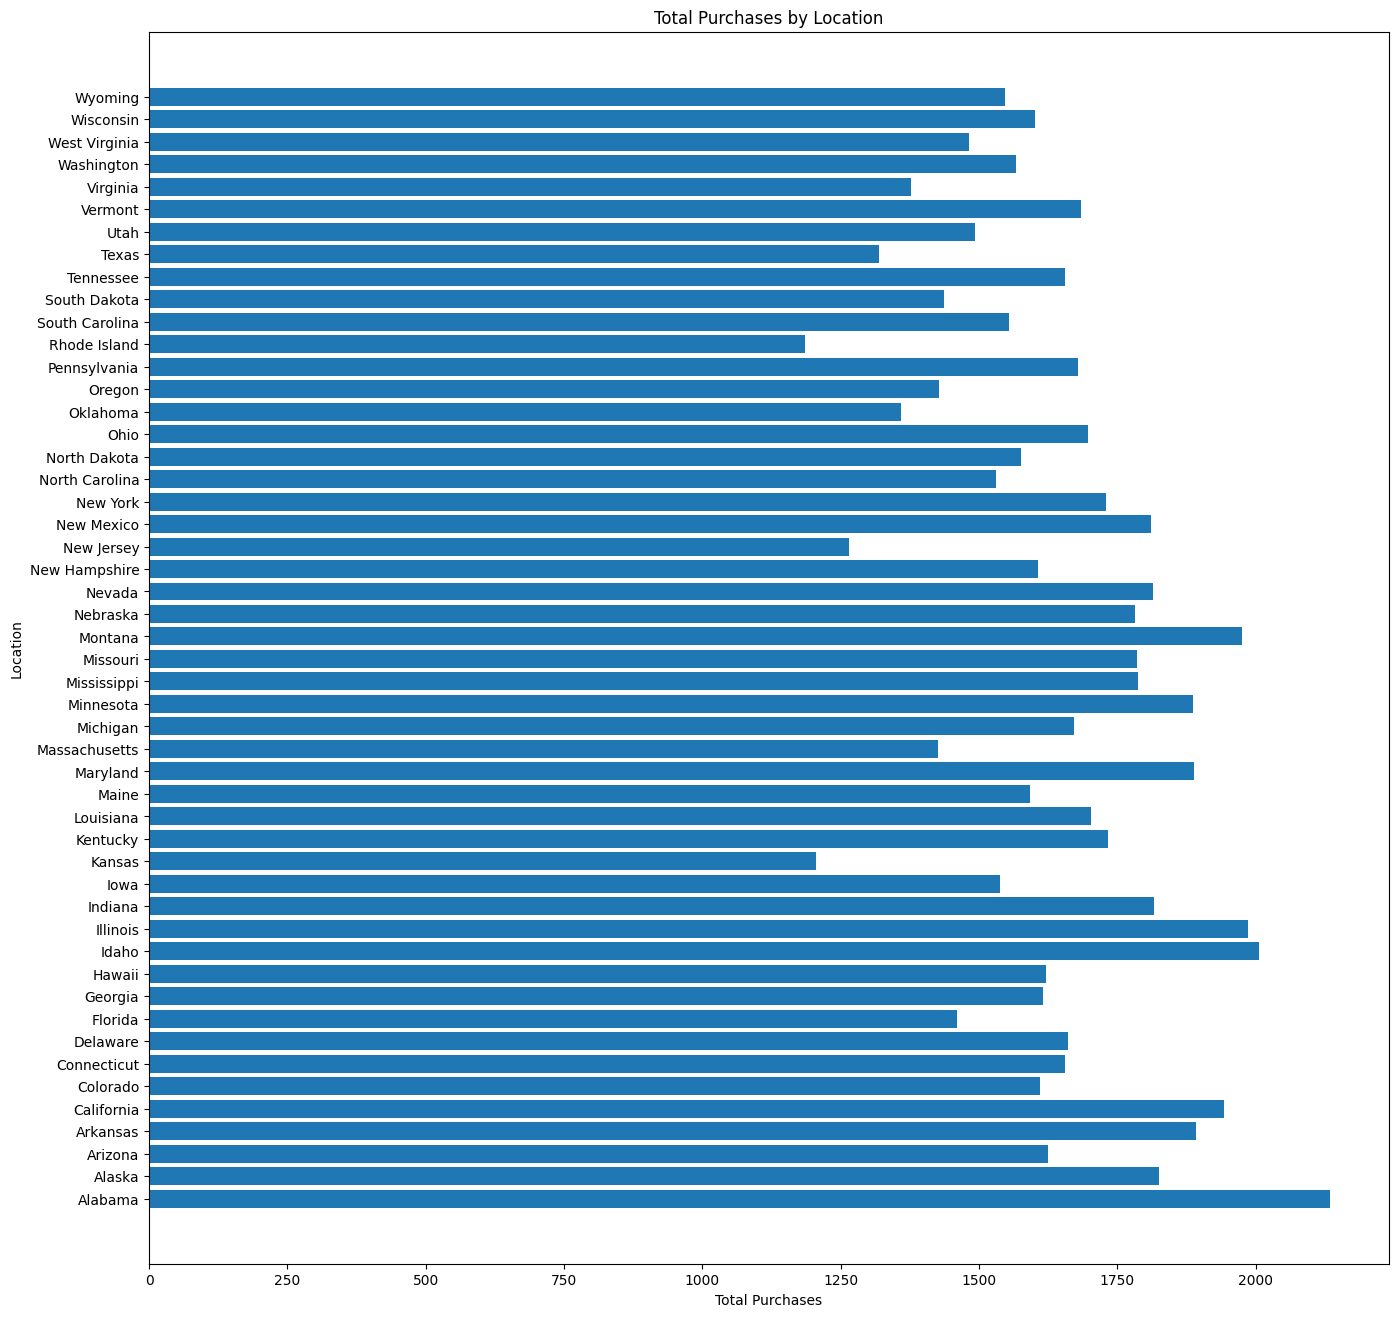

In [116]:
# Total Purchases from Each State
plt.figure(figsize=(16,16))
plt.barh(unique_locations,analysis_df.groupby('Location')['Previous Purchases'].sum())
plt.title('Total Purchases by Location')
plt.ylabel('Location')
plt.xlabel('Total Purchases')
plt.show()

In [117]:
location_pre_pruchase_sum=np.column_stack((unique_locations,np.array(analysis_df.groupby('Location')['Previous Purchases'].sum())))
location_pre_pruchase_sum[:,:][location_pre_pruchase_sum[:,1]==np.max(location_pre_pruchase_sum[:,1])]

array([['Alabama', 2134]], dtype=object)

### Review Rating and Category

Category
0    3.737198
1    3.711525
2    3.773737
3    3.756554
Name: Review Rating, dtype: float64


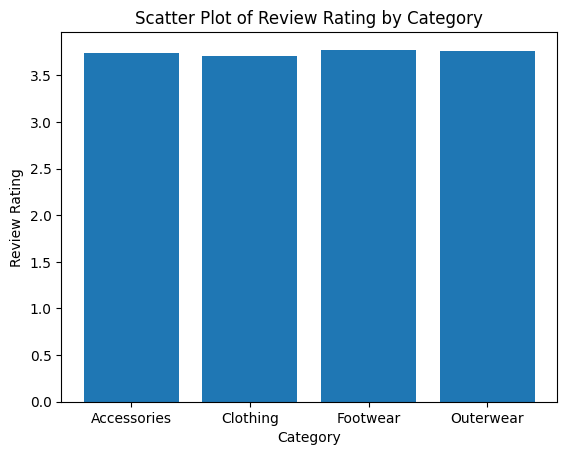

In [118]:
print(analysis_df.groupby('Category')['Review Rating'].mean())
plt.bar(unique_categories, analysis_df.groupby('Category')['Review Rating'].mean())
plt.title('Scatter Plot of Review Rating by Category')
plt.xlabel('Category')
plt.ylabel('Review Rating')
plt.show()

Best regards,<br>
<b>Lakshya Sharma</b><br>
{Last Updated: 21/10/2023 7:16pm}
